# Classification

In statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known. Examples are assigning a given email to the "spam" or "non-spam" class, and assigning a diagnosis to a given patient based on observed characteristics of the patient (sex, blood pressure, presence or absence of certain symptoms, etc.). Classification is an example of pattern recognition.

We will discuss qualitative (categorical) variables (classification problems). Classification problems can be thought of as regression problems since most of the models return a probability of being in a certain class. 


Since probabilities take on real values the problem can take the form regression with a threshold to decide the classes - as in logistic regression.  

In [1]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


/var/folders/5q/w_y2sfjj2bv130sh86slry7r0000gq/T/ipykernel_18114/2702892644.py:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
default = pd.read_csv("https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [40]:
# make column for Yes defaults
default['yes'] = (default['default'] == 'Yes').astype(int)

In [41]:
default.head(2)

,default,student,balance,income,yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0


(-100.0, 2500.0)

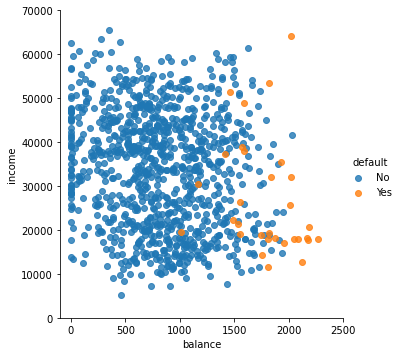

In [42]:
sns.lmplot(x='balance', y='income', data=default.sample(1000), hue='default', fit_reg=False)
plt.ylim([0,70000])
plt.xlim([-100,2500])

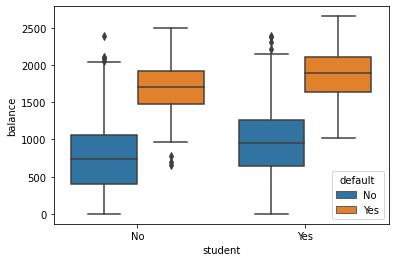

In [43]:
sns.boxplot(x='student', y='balance', data=default, hue='default');

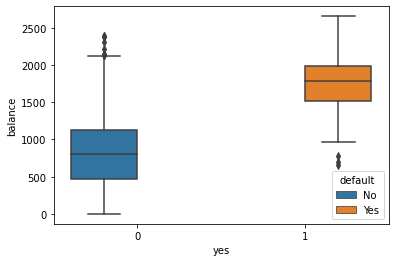

In [44]:
sns.boxplot(x='yes', y='balance', data=default, hue='default');

## Why not linear regression 

Though it is always possible to use numeric values for the categories of the response, there generally is no natural way to order and separate the values in a way that makes sense. Only in a two-category problem will the ordering make sense but even then linear regression will produce probability estimates outside of [0, 1].

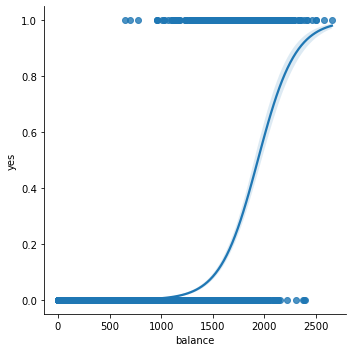

In [50]:
# Looks quite a bit different than the linear regression model
sns.lmplot(x='balance', y='yes', data=default, logistic=True)

## Logistic regression 

Find function that always outputs number between 0 and 1. Many functions satisfy this condition. For logistic regression the ... logistic function! is used.

$$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Many times you will see this as the sigmoid function in a simpler format

$$y = \frac{1}{1 + e^{-t}}$$

Where $t$ is just the normal linear model $t = \beta_0 + \beta_1X$. Some algebra can be used to show the two equations above are equivalent.

y can now be thought as the probability given some value X since it will always be between 0 and 1. Some more algebra can show that $$log{\frac{p(X)}{1 - p(X)}} = \beta_0 + \beta_1X$$

Where $y$ has been replaced by $p(X)$, the probability of $X$. The expression $\frac{p(X)}{1 - p(X)}$ is known as the 'odds'. So for instance if you are gambling and think that Clinton will win the presidency 80% of the time. The odds would be .8/.2 = 4 or said "4 to 1". For every 4 times she wins, Trump will win once.

What logistic regression is saying, that the log odds are modeled by a linear model which can be solved by linear regression. This has the literal meaning of - given a one unit increase in one of the variables (say $X_1$), a $\beta_1$ increase will occur to the log-odds. Or equivalently, the odds will be multiplied by $e^{\beta_1}$.

In our election example, $X_1$ could be the percentage of voters under 30 and $\beta_1$ could be .5. That would mean if $X_1$ were to increase by 1 percentage point, Clinton's log odds would increase by .5. In our example from above, Clinton's log odds would go from 4 to 4.5 and her probability of winning would go from 80% to 4.5 / 5.5 or 82%

There is no straight-line relationship between the probability of being in a certain class and X in logistic regression because of the need to have probabilities between 0 and 1.

## Estimating coefficients through Maximum Likelihood
In linear regression, the model coefficients were found by minimizing the squared residuals. In logistic regression, we maximize the probabilities of all points by a method called maximum likelihood. Maximum likelihood multiplies the model probability for each observation together and chooses parameters that maximize this number. The log likelihood is actually used as numerical underflow will be a problem for must problems with a non-trivial amount of data.  


In [51]:
results = smf.logit('yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Feb 2022   Pseudo R-squ.:                  0.4534
Time:                        15:32:42   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Interpretation

For every one dollar increase in balance the log odds increases by 0.00555. The log odds when there is no balance is -10.6.  

## Logistic Regression with regularization

The sklearn Logistic Regression _LogisticRegression()_ uses regularization by default.  See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The regularization strength can also be adjusted by the hyperparamtere _C_.

_C_ float, default=1.0

Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.


In [53]:
# this actually uses regularization by default
lr = LogisticRegression()

In [54]:
X = np.column_stack((np.ones(len(default)), default['balance']))

In [55]:
lr.fit(X, default['yes'])

LogisticRegression()

In [56]:
# Model coefficients are different by B1 is very similar
lr.coef_

array([[-5.16481986,  0.00530575]])

In [57]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99346413, 0.00653587]])

In [58]:
# predict 2000 dollar balance default
lr.predict_proba([[1, 2000]]) ## 55 percent chance default

array([[0.42999758, 0.57000242]])

In [59]:
# predict 3000 dollar balance default
lr.predict_proba([[1, 3000]]) ## >99 percent chance default

array([[0.00372998, 0.99627002]])

##  Multiple Linear Regression

Multiple predictors.

In [ ]:
results = smf.logit('yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.4619
Time:                        07:35:12   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Simpsons paradox

Simpson's paradox, which goes by several names, is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. This result is often encountered in social-science and medical-science statistics and is particularly problematic when frequency data is unduly given causal interpretations. The paradox can be resolved when causal relations are appropriately addressed in the statistical modeling. It is also referred to as Simpson's reversal, Yule–Simpson effect, amalgamation paradox, or reversal paradox.


![Simpson's paradox for quantitative data](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/440px-Simpson's_paradox_continuous.svg.png)

_Simpson's paradox for quantitative data: a positive trend appears for two separate groups, whereas a negative trend appears when the groups are combined._


![Simpson's paradox for quantitative data](https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/img/440px-Simpsons_paradox_-_animation.gif)

_An alternative visualization of Simpson's paradox on data resembling real-world variability indicates that risk of misjudgement of true relationship can indeed be hard to spot_


In [ ]:
results = smf.logit('yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                0.004097
Time:                        07:35:12   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

The first model above with both balance and student show a negative relationship between student and default - meaning that being a student decreases the likelihood of defaulting. The second model shows the opposite, that being a student increases the chance at defaulting. This can be explained by the fact that students have more debt on average but compared to those with the same amount of debt they are less likely to default.

### Multiclass logistic regression   

The book unfortunately does not cover logistic regression with more than 2 classes, though this is a common occurrence in many real life problems.

### One vs All  

A simple method when you have k classes where k > 2 is to create k-1 independent logistic regression classifiers by choosing the response variable to be binary, 1 when in the current class else 0.  

## Linear Discriminant Analysis  

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition, and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. Not to be confused with latent dirichlet allocation. Used for multiclass classificaion problems.   LDA assumes all perdictor variables come from a gaussian distribution and estimates the mean and variance for each predictor variable where the variance is the same across for each predictor variable. It also estimates a prior probability simply by using the proporiton of classes in the training set. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

LDA is closely related to analysis of variance (ANOVA) and regression analysis, which also attempt to express one dependent variable as a linear combination of other features or measurements. However, ANOVA uses categorical independent variables and a continuous dependent variable, whereas discriminant analysis has continuous independent variables and a categorical dependent variable (i.e. the class label). Logistic regression and probit regression are more similar to LDA than ANOVA is, as they also explain a categorical variable by the values of continuous independent variables.

Bayes rule is used to compute a probability for each class. When there is more than one predictor, a multivariate gaussian is used. Correlations between each predictor must be estimated (the covariance matrix) as they are a parameter to the multivariate gaussian.

### Stock market prediciton with LDA  

In these data we will try to predict whether the market will go up or down tomorrow.  



In [ ]:
smarket = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/smarket.csv')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [ ]:
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [ ]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Up
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Up,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


In [ ]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [ ]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [ ]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                0.001651
Time:                        07:35:13   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# true on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 30, 111]])

In [ ]:
147/ len(y_test)

0.5833333333333334

Out of the 68 predicted down, 37 actually were down days. 

54% accurracy  

Out of the 184 predicted up, 111 actually were up. 60% accuracy.  

58% total accuracy  

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred[y_test == 1]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
#almost exact same as logistic regression
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]])

In [ ]:
lda.priors_

array([0.49198397, 0.50801603])

In [ ]:
# use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
#almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train[:,:2], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[48, 63],
       [55, 86]])

## Excercises

Question 1

Convert equation 1.1 to 1.2.  

1.1
$$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

1.2
$$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$$

Answer 1

First, multiply 1.1 by negative 1 and add 1 to both sides
$$1 - p(x) = 1 - \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$
Simplify right hand side
$$1 - p(x) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$$
Now just divide 1.2 by the last equation and you have the result



In [ ]:
# a
b0 = -6
b1 = .05
b2 = 1
x1 = 40
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
print("student has a {:.3f} probability of getting an A".format(1 / (1 + np.exp(-t))))

#b. solve for t = 0. Since an odds of 1 corresponds to 50/50 chance and log(1) = 0
# 0 = -6 + b1 * x1 + b2 * x2
hours = (6 - b2 * x2) / b1
print("student needs to study {} hours to have a 50% chance at an A".format(1 / (1 + np.exp(-t))))

student has a 0.378 probability of getting an A
student needs to study 0.3775406687981454 hours to have a 50% chance at an A


In [ ]:
# double check 50%
b0 = -6
b1 = .05
b2 = 1
x1 = 50
x2 = 3.5
t = -6 + b1 * x1 + b2 * x2
1 / (1 + np.exp(-t))

0.5

In [ ]:
# 7
prior = .8
mu_d = 10
mu_no_d = 0
sigma = 6
normal = lambda x, m, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - m) ** 2 / (2 * s ** 2))

In [ ]:
f_d = normal(4, 10, 6)
f_no_d = normal(4, 0, 6)
f_d, f_no_d

(0.0403284540865239, 0.053241334253725375)

In [ ]:
# bayes
prob_div = prior * f_d / (prior * f_d + (1 - prior) * f_no_d)
print("Probability of dividend is {:.3f}".format(prob_div))

Probability of dividend is 0.752


In [ ]:
# a
# p / (1 - p) = .37
# 1 / p - 1 = 1 / .37
odds = .37
one_over_p = 1 + 1 / odds
p = 1 / one_over_p
print("The probability of defaulting with odds of {} are {:.2f}".format(odds, p))
print("The odds of defaulting with probability .16 are {:.2f}".format(.16 / .84))

The probability of defaulting with odds of 0.37 are 0.27
The odds of defaulting with probability .16 are 0.19


# 2. The following questions should be answered using the Weekly data set. It contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [ ]:
weekly = pd.read_csv("https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/weekly.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
# strongest correlations with today are lag1 and lag3
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


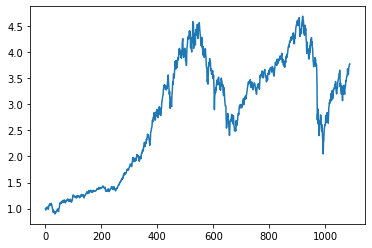

In [ ]:
today = weekly['Today']
today_perc = (100 + today) / 100
today_perc.cumprod().plot()

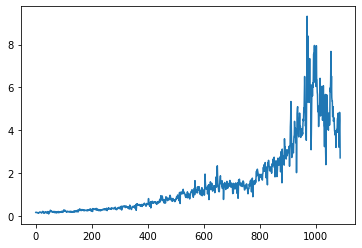

In [ ]:
weekly['Volume'].plot()

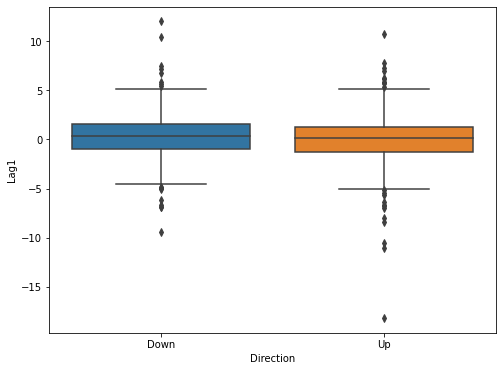

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot('Direction', 'Lag1', data=weekly)

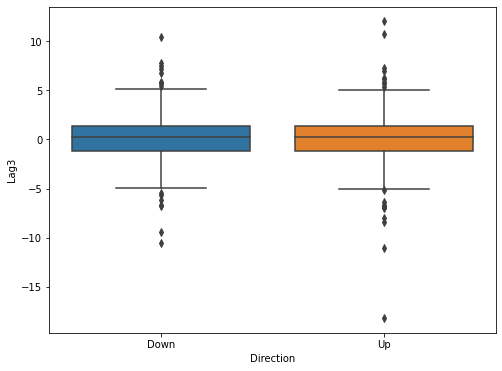

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot('Direction', 'Lag3', data=weekly)

(b) Perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [ ]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [ ]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                0.006580
Time:                        07:35:14   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [ ]:
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                0.003866
Time:                        07:35:14   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

In [ ]:
predictions = np.where(results.predict(weekly) > .5, 1, 0)

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [ ]:
confusion_matrix(weekly['Direction'], predictions)

array([[ 33, 451],
       [ 26, 579]])

In [ ]:
451 / 1030 

0.43786407766990293

In [ ]:
weekly['Direction'].mean()

0.5555555555555556

(d) Fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [ ]:
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [ ]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
confusion_matrix(y_test, lr.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

(e) Repeat (d) using LDA.

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

(f) Repeat (d) using QDA.

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


array([[43,  0],
       [61,  0]])

(g) Repeat (d) using KNN with K = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[21, 22],
       [30, 31]])

(h) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]])

In [ ]:
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:               8.318e-06
Time:                        07:35:15   Log-Likelihood:                -748.09
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9112
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2256      0.065      3.475      0.001       0.098       0.353
np.power(Lag5, 2)    -0.0004      0.004     -0.112      0.911      -0.008       0.007
=====================================================================================
"""

In [ ]:
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:               0.0001136
Time:                        07:35:15   Log-Likelihood:                -748.02
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.6801
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2359      0.068      3.448      0.001       0.102       0.370
np.power(Volume, 2)    -0.0024      0.006     -0.413      0.680      -0.014       0.009
=======================================================================================
"""

In [ ]:
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:               0.0006650
Time:                        07:35:15   Log-Likelihood:                -747.60
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.8025
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2631      0.084      3.134      0.002       0.099       0.428
Volume         -0.0235      0.036     -0.649      0.516      -0.095       0.048
Lag3           -0.0188      0.039     -0.482      0.630      -0.095       0.058
Volume:Lag3    -0.0007      0.011     -0.067      0.946      -0.022       0.020
===============================================================================
"""

# 3. Now, lets develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [ ]:
auto = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. 

Note - you can use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [ ]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [ ]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


(b) Which of the other features seem most likely to be useful in predicting mpg01?

In [ ]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.9285714285714286

In [ ]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# slightly higher with more variables
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8979591836734694

In [ ]:
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.8367346938775511

(c)  Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test accuracy of the model obtained?

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9489795918367347

(d) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test accuracy of the model obtained?

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9489795918367347

(e) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test accuracies do you obtain?
Which value of K seems to perform the best on this data set?

In [ ]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))

With K=1 accuracy is 0.878
With K=2 accuracy is 0.888
With K=3 accuracy is 0.898
With K=4 accuracy is 0.898
With K=5 accuracy is 0.867
With K=6 accuracy is 0.898
With K=7 accuracy is 0.888
With K=8 accuracy is 0.908
With K=9 accuracy is 0.908
With K=10 accuracy is 0.898
With K=11 accuracy is 0.908
With K=12 accuracy is 0.908
With K=13 accuracy is 0.908
With K=14 accuracy is 0.908
With K=15 accuracy is 0.898
With K=16 accuracy is 0.898
With K=17 accuracy is 0.888
With K=18 accuracy is 0.918
With K=19 accuracy is 0.918
With K=20 accuracy is 0.918
With K=21 accuracy is 0.908
With K=22 accuracy is 0.908
With K=23 accuracy is 0.908
With K=24 accuracy is 0.918
With K=25 accuracy is 0.908
With K=26 accuracy is 0.918
With K=27 accuracy is 0.918
With K=28 accuracy is 0.918
With K=29 accuracy is 0.918
With K=30 accuracy is 0.918
With K=31 accuracy is 0.918
With K=32 accuracy is 0.918
With K=33 accuracy is 0.908
With K=34 accuracy is 0.908
With K=35 accuracy is 0.898
With K=36 accuracy is 0.908
W

# 4. Write a function, power(x,a), allows you to pass any two numbers, x and a, and prints out the value of x^a.

In [ ]:
power = lambda x, a: x ** a

In [ ]:
power(3, 8)

6561

# 5. Create a function, PlotPower(), that allows you to create a plot of x against x^a for a fixed a and for a range of values of x.

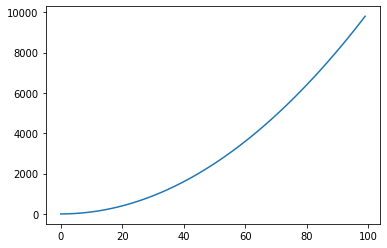

In [ ]:
n = 100
plt.plot(range(n), [power(x, 2) for x in range(n)])

In [ ]:
def plot_power(rng, p):
    plt.plot(rng, [power(x, p) for x in rng])

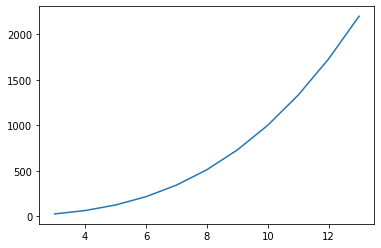

In [ ]:
plot_power(range(3,14), 3)

# 6. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [ ]:
boston = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/Google_Colab/master/data/boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.905511811023622

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.8740157480314961

In [ ]:
X = boston.iloc[:,1:-1].values
y = boston['crim01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8503937007874016